In [1]:
import pandas as pd
import numpy
%matplotlib inline

In [3]:
data = pd.read_csv("data.csv") # Carregar os dados

In [4]:
data.head() # Olhar o que a gente tem

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
features = data.filter(regex=r"_mean", axis=1) # Aplicar filtro para aparecer só médias, vai selecionar colunas que tiver _mean

In [8]:
features.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2                 0.05999  
3                 0.09744  
4                 0.05883

In [10]:
y = data['diagnosis'].map({"M": 0, "B": 1}) # Pega as colunas diagnosis. Maligno = 0; Benigno = 1


In [11]:
y.value_counts()


1    357
0    212
Name: diagnosis, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

In [13]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape


((284, 10), (285, 10), (284,), (285,))

In [15]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain) # Modelo que iremos treinar muito eficiente, com menos erro possível

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [16]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       106
           1       0.92      0.98      0.95       179

    accuracy                           0.93       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.93      0.93      0.93       285



In [18]:
# precision: todo mundo que nosso modelo falou que era um e quantos realmente era um, e ao contrário
# recall: de todos os exemplos benignos, quantos conseguimos detectar, e ao contrário 

In [19]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [20]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

In [22]:
explainer # Um objeto

In [23]:
shap_values[1].shape # Vai ter um valor para cada picture 

(284, 10)

In [33]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:]) # Passando nossa matriz de treino. 
# Matriz da probabilidade de ser benigna


In [32]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:]) # Porque o modelo tomou a decisão

In [35]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain) # Com vários exemplos que temos, conseguimos ver as previsões. # Podemos analisar exatamente o ponto em que o modelo decidiu que era benigno

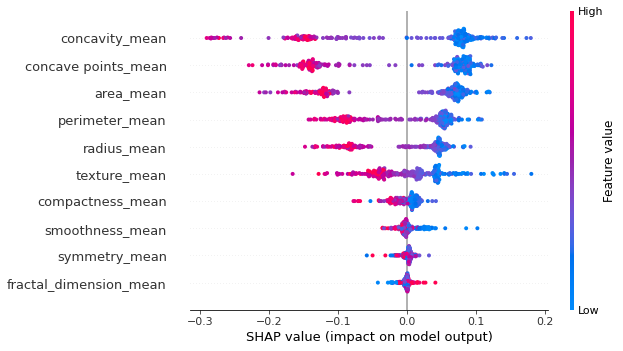

In [38]:
shap.summary_plot(shap_values[1], Xtrain) # Esquerda diminiu a previsão de ser benigno. Direita aumenta a previsão de ser benigno
# Onde está a concentração de pontos 

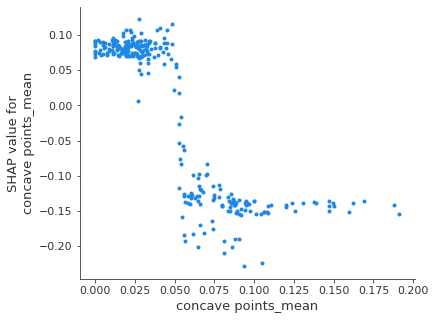

In [41]:
shap.dependence_plot("concave points_mean", shap_values[1], Xtrain, interaction_index=None) # Quando passa de 0.5, o modelo fica confuso
# A chance do tumor ser benigno é muito maior quando essa média de pontos das células é menor que 0.05

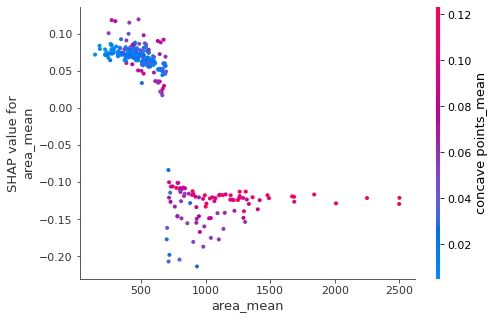

In [45]:
shap.dependence_plot("area_mean", shap_values[1], Xtrain, interaction_index="concave points_mean") # Correlação das variáveis